In [3]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import torch
import torchtext
from torchtext import data
import spacy
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

df = pd.read_csv("./data/liar_dataset/result_toxic_analysis.csv")

/Users/rene/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


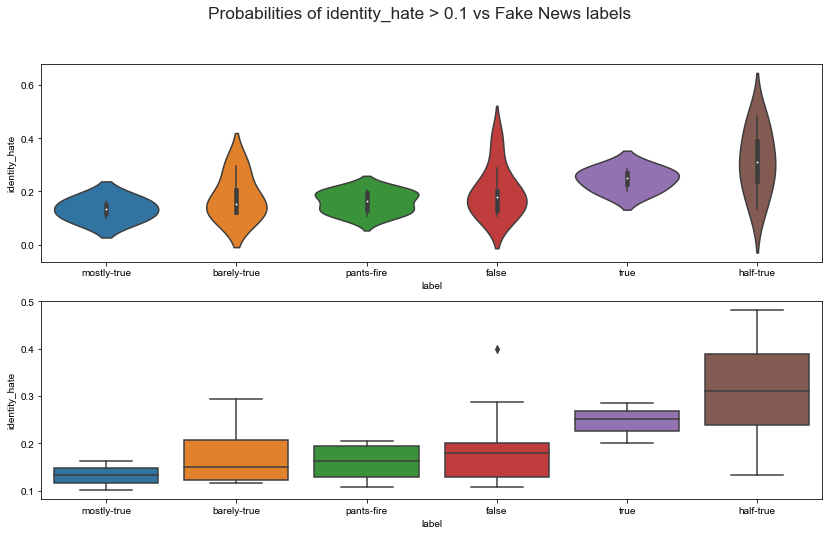

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(14, 8))
axx=ax.flat
th=0.1
cat= 'identity_hate'
_df = df[ (df[cat]>th)  ] 

sns.violinplot(y=cat,x= 'label' , data= _df, kind="box", ax=axx[0])
sns.catplot(y=cat,x= 'label' , data=_df, kind="box", ax=axx[1])
sns.set(font_scale=1.2)
fig.suptitle('Probabilities of identity_hate > 0.1 vs Fake News labels')

plt.close(2);

In [5]:
_label= 'identity_hate'
_df= df[['statement',_label,'half_true_counts']].sort_values(by=_label, ascending=False).reset_index(drop=True).head()

In [6]:
_df

,statement,identity_hate,half_true_counts
0,On whether judges should be allowed to place c...,0.481538,15.0
1,In n states in this country you can still get ...,0.426600,1.0
2,There are more atheists in the country right n...,0.400353,0.0
3,The city of Atlanta has one of the highest les...,0.349135,1.0
4,An attack on a healthy n year old homosexual m...,0.310115,1.0
